In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_RF_function_and_feature_ranking_TNGSIM as functions
import RF_target_predicting_and_learning_curves_functions_TNGSIM as tp_lc_functions

In [2]:
# Using the 0D TNG100 SIM data at z=0 (version 3 of the dataset in this notebook, 
# which includes galaxies with log10Mstar=8 and MHI and MH2 are usable features)

df_0D = pd.read_csv('TNG-SIM_images/v3_initial_analysis/v3_TNG-SIM_0D_Dataset.csv')
df_raw = pd.read_csv('TNG-SIM_images/v3_initial_analysis/v3_TNG-SIM_Raw_Dataset.csv')
print("df_0D.shape", df_0D.shape)
print("df_raw.shape", df_raw.shape)

df_0D.shape (21598, 17)
df_raw.shape (21598, 20)


### <font color='purple'> <a id =10> </a> <br> RF & Feature Ranking Complete 0D Dataset

In [4]:
df_0D.columns.to_list()

['SubhaloGasMetallicity',
 'SubhaloSFRinRad',
 'SubhaloStarMetallicity',
 'GroupNsubs',
 'GroupSpin_dmo',
 'SubhaloRstar_0D',
 'SubhaloRgas_0D',
 'SubhaloVmaxRad_0D',
 'SubhaloVmax_0D',
 'SubhaloVelDisp_0D',
 'SubhaloMgas_0D',
 'SubhaloMstar_0D',
 'SubhaloBHMass_0D',
 'GroupBHMass_0D',
 'SubhaloBHMdot_0D',
 'SubhaloMHI_0D',
 'SubhaloMH2_0D']

In [5]:
X_all = df_0D.drop(columns=['SubhaloRstar_0D'])
 

y_all = df_0D.loc[:,'SubhaloRstar_0D']

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.7721 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
RF Accuracy: 0.78 (+/- 0.03)


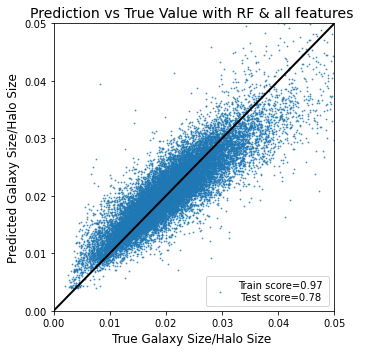

Elapsed time to compute the importances: 0.365 seconds
Elapsed time to compute the importances: 147.105 seconds


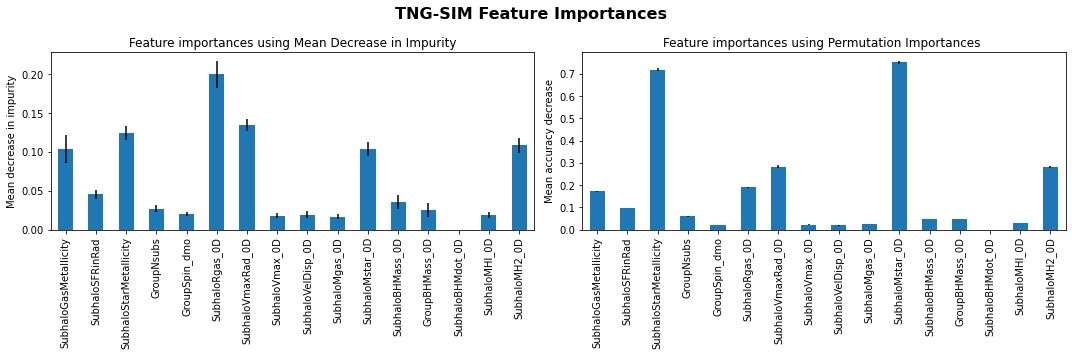

  0%|                                                    | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  6%|██▌                                      | 1/16 [06:51<1:42:45, 411.06s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 12%|█████▏                                   | 2/16 [13:47<1:36:40, 414.33s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 19%|███████▋                                 | 3/16 [20:47<1:30:19, 416.88s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 25%|██████████▎                              | 4/16 [23:28<1:03:07, 315.65s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 31%|████████████▊                            | 5/16 [32:23<1:12:24, 394.94s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|███████████████▍                         | 6/16 [39:43<1:08:22, 410.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 44%|█████████████████▉                       | 7/16 [48:14<1:06:28, 443.15s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|████████████████████▌                    | 8/16 [56:22<1:00:59, 457.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 56%|███████████████████████                  | 9/16 [1:04:37<54:43, 469.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|█████████████████████████               | 10/16 [1:11:34<45:17, 452.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 69%|███████████████████████████▌            | 11/16 [1:19:38<38:33, 462.67s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 75%|██████████████████████████████          | 12/16 [1:24:18<27:08, 407.15s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 81%|████████████████████████████████▌       | 13/16 [1:28:57<18:24, 368.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 88%|███████████████████████████████████     | 14/16 [1:30:46<09:39, 289.92s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 94%|█████████████████████████████████████▌  | 15/16 [1:38:05<05:34, 334.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 16/16 [1:45:35<00:00, 395.96s/it]


1. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  7%|██▋                                      | 1/15 [08:47<2:03:10, 527.93s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 13%|█████▍                                   | 2/15 [17:38<1:54:39, 529.22s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 20%|████████▏                                | 3/15 [26:26<1:45:48, 529.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 27%|██████████▉                              | 4/15 [33:29<1:29:17, 487.07s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|█████████████▋                           | 5/15 [42:47<1:25:24, 512.48s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 40%|████████████████▍                        | 6/15 [52:13<1:19:36, 530.74s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 47%|██████████████████▏                    | 7/15 [1:01:28<1:11:49, 538.63s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 53%|████████████████████▊                  | 8/15 [1:10:42<1:03:24, 543.51s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 60%|████████████████████████▌                | 9/15 [1:19:28<53:48, 538.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|██████████████████████████▋             | 10/15 [1:28:42<45:15, 543.03s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 73%|█████████████████████████████▎          | 11/15 [1:37:01<35:18, 529.72s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 80%|████████████████████████████████        | 12/15 [1:45:44<26:22, 527.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 87%|██████████████████████████████████▋     | 13/15 [1:53:50<17:09, 514.92s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 93%|█████████████████████████████████████▎  | 14/15 [2:03:26<08:53, 533.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 15/15 [2:12:47<00:00, 531.17s/it]


2. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175


  0%|                                                    | 0/14 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  7%|██▉                                      | 1/14 [11:50<2:33:54, 710.36s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 14%|█████▊                                   | 2/14 [23:43<2:22:26, 712.25s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 21%|████████▊                                | 3/14 [35:29<2:10:01, 709.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 29%|███████████▋                             | 4/14 [45:30<1:51:05, 666.58s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 36%|██████████████▋                          | 5/14 [57:45<1:43:38, 690.99s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 43%|████████████████▋                      | 6/14 [1:09:47<1:33:33, 701.64s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|███████████████████▌                   | 7/14 [1:22:02<1:23:08, 712.70s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|██████████████████████▎                | 8/14 [1:33:38<1:10:42, 707.14s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|██████████████████████████▎              | 9/14 [1:45:33<59:08, 709.69s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 71%|████████████████████████████▌           | 10/14 [1:57:04<46:56, 704.03s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 79%|███████████████████████████████▍        | 11/14 [2:08:34<34:59, 699.76s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 86%|██████████████████████████████████▎     | 12/14 [2:18:58<22:33, 676.73s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 93%|█████████████████████████████████████▏  | 13/14 [2:30:42<11:24, 684.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 14/14 [2:42:16<00:00, 695.44s/it]


3. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829


  0%|                                                    | 0/13 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▏                                     | 1/13 [15:37<3:07:30, 937.51s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 15%|██████▎                                  | 2/13 [31:17<2:52:09, 939.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 23%|█████████▍                               | 3/13 [46:56<2:36:31, 939.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 31%|████████████                           | 4/13 [1:01:16<2:16:11, 907.90s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|███████████████                        | 5/13 [1:17:32<2:04:17, 932.19s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 46%|██████████████████                     | 6/13 [1:33:45<1:50:23, 946.21s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 54%|█████████████████████                  | 7/13 [1:50:00<1:35:34, 955.67s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|████████████████████████               | 8/13 [2:06:07<1:19:55, 959.09s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 69%|███████████████████████████            | 9/13 [2:21:59<1:03:48, 957.06s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 77%|██████████████████████████████▊         | 10/13 [2:38:07<48:01, 960.53s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 85%|█████████████████████████████████▊      | 11/13 [2:54:11<32:03, 961.56s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|████████████████████████████████████▉   | 12/13 [3:08:00<15:20, 921.00s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 13/13 [3:24:24<00:00, 943.44s/it]


4. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378


  0%|                                                    | 0/12 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▎                                    | 1/12 [17:59<3:17:57, 1079.78s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 17%|██████▋                                 | 2/12 [35:55<2:59:35, 1077.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|██████████                              | 3/12 [52:14<2:34:50, 1032.30s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|████████████▋                         | 4/12 [1:10:21<2:20:30, 1053.81s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 42%|███████████████▊                      | 5/12 [1:28:23<2:04:08, 1064.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|███████████████████                   | 6/12 [1:46:25<1:47:00, 1070.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 58%|██████████████████████▏               | 7/12 [2:04:22<1:29:22, 1072.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|█████████████████████████▎            | 8/12 [2:22:20<1:11:37, 1074.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|██████████████████████████████          | 9/12 [2:39:48<53:17, 1065.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 83%|████████████████████████████████▌      | 10/12 [2:57:28<35:28, 1064.24s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|███████████████████████████████████▊   | 11/12 [3:12:56<17:02, 1022.56s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|███████████████████████████████████████| 12/12 [3:30:40<00:00, 1053.38s/it]


5. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807


  0%|                                                    | 0/11 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  9%|███▋                                    | 1/11 [19:29<3:14:54, 1169.50s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 18%|███████▎                                | 2/11 [39:11<2:56:34, 1177.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 27%|██████████▉                             | 3/11 [57:30<2:32:09, 1141.13s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 36%|█████████████▊                        | 4/11 [1:17:21<2:15:26, 1160.89s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 45%|█████████████████▎                    | 5/11 [1:36:51<1:56:26, 1164.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 55%|████████████████████▋                 | 6/11 [1:56:35<1:37:34, 1170.91s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|████████████████████████▏             | 7/11 [2:16:21<1:18:23, 1175.78s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 73%|█████████████████████████████           | 8/11 [2:35:38<58:29, 1169.80s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 82%|████████████████████████████████▋       | 9/11 [2:55:10<39:00, 1170.37s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 91%|███████████████████████████████████▍   | 10/11 [3:12:40<18:53, 1133.44s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|███████████████████████████████████████| 11/11 [3:32:29<00:00, 1159.04s/it]


6. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 10%|████                                    | 1/10 [20:16<3:02:31, 1216.83s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 20%|████████                                | 2/10 [40:44<2:43:06, 1223.27s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 30%|███████████▍                          | 3/10 [1:01:24<2:23:36, 1230.94s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 40%|███████████████▏                      | 4/10 [1:22:01<2:03:20, 1233.40s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|███████████████████                   | 5/10 [1:42:51<1:43:16, 1239.37s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 60%|██████████████████████▊               | 6/10 [2:03:34<1:22:42, 1240.58s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 70%|██████████████████████████▌           | 7/10 [2:23:50<1:01:36, 1232.31s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 80%|████████████████████████████████        | 8/10 [2:43:36<40:35, 1217.69s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 90%|████████████████████████████████████    | 9/10 [3:01:36<19:34, 1174.53s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|███████████████████████████████████████| 10/10 [3:21:18<00:00, 1207.86s/it]


7. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812
	 7 SubhaloBHMass_0D 0.7490001771700765


  0%|                                                     | 0/9 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 11%|████▌                                    | 1/9 [23:19<3:06:36, 1399.62s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 22%|█████████                                | 2/9 [45:23<2:38:04, 1354.89s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|█████████████                          | 3/9 [1:09:18<2:19:08, 1391.43s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 44%|█████████████████▎                     | 4/9 [1:36:18<2:03:28, 1481.67s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 56%|█████████████████████▋                 | 5/9 [2:00:48<1:38:30, 1477.65s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|██████████████████████████             | 6/9 [2:23:19<1:11:43, 1434.63s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 78%|███████████████████████████████▉         | 7/9 [2:45:23<46:36, 1398.35s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 89%|████████████████████████████████████▍    | 8/9 [3:05:40<22:20, 1340.75s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|█████████████████████████████████████████| 9/9 [3:28:09<00:00, 1387.71s/it]


8. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812
	 7 SubhaloBHMass_0D 0.7490001771700765
	 8 SubhaloGasMetallicity 0.7613187622677158


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 12%|█████▏                                   | 1/8 [26:22<3:04:39, 1582.73s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|██████████▎                              | 2/8 [52:53<2:38:43, 1587.29s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|██████████████▋                        | 3/8 [1:19:10<2:11:52, 1582.58s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|███████████████████▌                   | 4/8 [1:44:37<1:44:03, 1560.94s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|████████████████████████▍              | 5/8 [2:10:31<1:17:54, 1558.29s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|██████████████████████████████▊          | 6/8 [2:36:32<51:58, 1559.26s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 88%|███████████████████████████████████▉     | 7/8 [3:00:30<25:19, 1519.41s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|█████████████████████████████████████████| 8/8 [3:35:34<00:00, 1616.80s/it]


9. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812
	 7 SubhaloBHMass_0D 0.7490001771700765
	 8 SubhaloGasMetallicity 0.7613187622677158
	 9 SubhaloSFRinRad 0.7630159991463801


  0%|                                                     | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 14%|█████▊                                   | 1/7 [40:41<4:04:09, 2441.63s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 29%|███████████▏                           | 2/7 [1:05:34<2:36:58, 1883.79s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 43%|████████████████▋                      | 3/7 [1:31:30<1:55:35, 1733.83s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|██████████████████████▎                | 4/7 [1:58:16<1:24:10, 1683.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 71%|█████████████████████████████▎           | 5/7 [2:25:17<55:21, 1660.78s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 86%|███████████████████████████████████▏     | 6/7 [2:50:25<26:48, 1608.80s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|█████████████████████████████████████████| 7/7 [3:17:47<00:00, 1695.36s/it]


10. iteration: 
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
	 3 SubhaloMH2_0D 0.4804148357063829
	 4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812
	 7 SubhaloBHMass_0D 0.7490001771700765
	 8 SubhaloGasMetallicity 0.7613187622677158
	 9 SubhaloSFRinRad 0.7630159991463801
	 10 SubhaloMHI_0D 0.7693219504838575


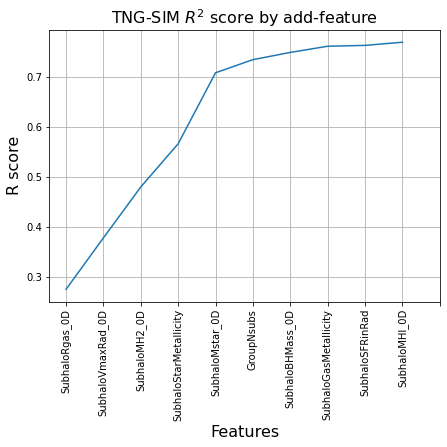

Elapsed time to run RF func on TNG-SIM: 120848.218 seconds


In [6]:
# this code takes 35,113 seconds ~ 10 hrs to run when the dataset is TNG-SIM galaxies with ~13,000 entries
# and 14 features (384 models for the RF; 288 models for each add-on feature ranking step, cv=3, so 864 fits )
start_time = time.time()

RF_results_all = functions.target_predicting_RF_function(X=X_all, y=y_all)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on TNG-SIM: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best params, best score: 0.7721 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
RF Accuracy: 0.78 (+/- 0.03)

    n_estimators = [20, 50,100, 500, 700]
    # create random grid
    grid = {'bootstrap': [True],
                   'max_depth': [2, 5, 10, None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4, 8],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': n_estimators}
    # Grid search of parameters
    rfr_grid = GridSearchCV(estimator = regr_RF, param_grid = grid, cv = KFold(n_splits=5, shuffle=True),                          verbose = 1, n_jobs = -1, return_train_score=True)

For feature ranking:

Fitting 3 folds for each of 288 candidates, totalling 864 fits

    n_estimators = [50,100, 500]
    grid = {'bootstrap': [True],
                   'max_depth': [2, 5, None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5],
                   'n_estimators': n_estimators}

#### The most important features (TNG100-SIM w log10Mstar=8 gals included) are:
	 1 SubhaloRgas_0D 0.27610634394573513
	 2 SubhaloVmaxRad_0D 0.37870134394954175
     3 SubhaloMH2_0D 0.4804148357063829
     4 SubhaloStarMetallicity 0.5666443699927378
	 5 SubhaloMstar_0D 0.708355347787807
	 6 GroupNsubs 0.7345274146230812
     7 SubhaloBHMass_0D 0.7490001771700765
     8 SubhaloGasMetallicity 0.7613187622677158
     9 SubhaloSFRinRad 0.7630159991463801
     10 SubhaloMHI_0D 0.7693219504838575

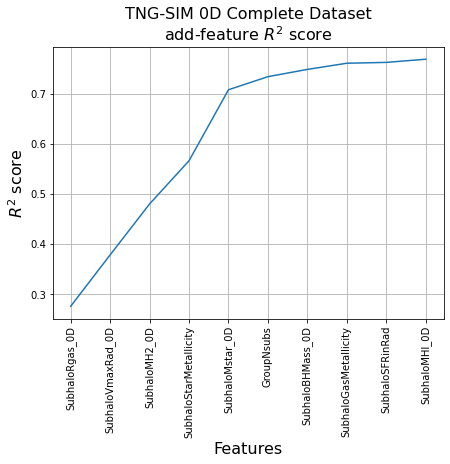

In [7]:
all_0D_fig_add_feature=RF_results_all[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
all_0D_fig_add_feature.set_title(label= r'TNG-SIM 0D Complete Dataset' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
all_0D_fig_add_feature.set_xlabel('Features',fontsize=16)
all_0D_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# all_0D_fig_add_feature.get_figure().savefig('TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [8]:
# RF_results_all[4].to_csv('TNG-SIM_images/v4_RF_FeatRank/v4_TNG_0D_AllDataset_Max_r_scores_by_add_column_method.csv', index=False)

all_0D = pd.read_csv('TNG-SIM_images/v4_RF_FeatRank/v4_TNG_0D_AllDataset_Max_r_scores_by_add_column_method.csv')

all_0D_fig = RF_results_all[1]
# all_0D_fig.savefig('TNG-SIM_images/v4_RF_FeatRank/v4_TNG_0D_AllDataset_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

all_0D_fig_builtin_imp = RF_results_all[2]
# all_0D_fig_builtin_imp.savefig('TNG-SIM_images/v4_RF_FeatRank/v4_TNG_0D_AllDataset_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [3]:
# y_pred_RF_df_all = RF_results_all[0]
# y_pred_RF_df_all = pd.DataFrame({'y_pred_RF SIM 0D': y_pred_RF_df_all})

# y_pred_RF_df_all.to_csv('TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_all = pd.read_csv('TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_y_pred_RF_predicted_sizes.csv')

In [10]:
all_0D

,feature_number,features,r_sq_score
0,1,SubhaloRgas_0D,0.276106
1,2,SubhaloVmaxRad_0D,0.378701
2,3,SubhaloMH2_0D,0.480415
3,4,SubhaloStarMetallicity,0.566644
4,5,SubhaloMstar_0D,0.708355
5,6,GroupNsubs,0.734527
6,7,SubhaloBHMass_0D,0.749000
7,8,SubhaloGasMetallicity,0.761319
8,9,SubhaloSFRinRad,0.763016
9,10,SubhaloMHI_0D,0.769322


In [11]:
y_pred_RF_all

,y_pred_RF SIM 0D
0,0.028141
1,0.036783
2,0.029128
3,0.025400
4,0.040377
...,...
21593,0.055929
21594,0.041319
21595,0.056063
21596,0.051052


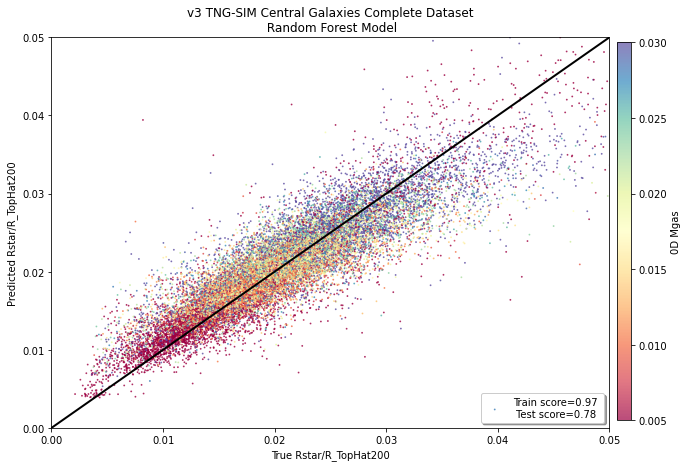

In [13]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

label = ('Train score=0.97 \n Test score=0.78')
im5 = ax5.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                 c = df_0D.loc[:, 'SubhaloMgas_0D'],cmap='Spectral', vmin=0.005, vmax=0.03)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
ax5.axis([0.0,0.05, 0.0,0.05])
ax5.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
ax5.set_title(r'v3 TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
ax5.set_xlabel('True Rstar/R_TopHat200')
ax5.set_ylabel('Predicted Rstar/R_TopHat200')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'0D Mgas')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_RF_size_prediction_colorMgas.jpeg", dpi=500)
plt.show()

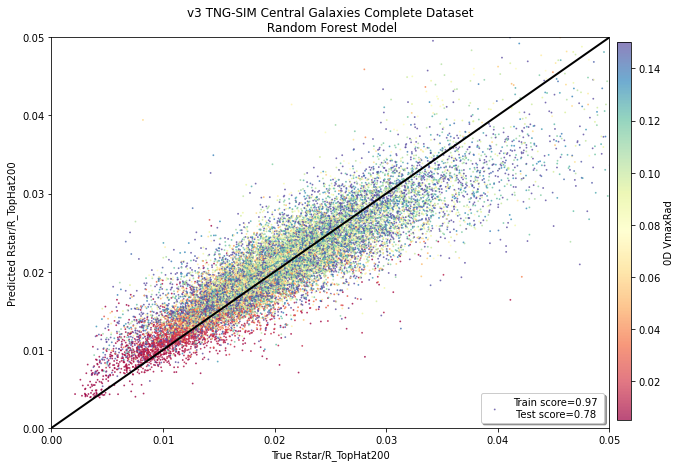

In [15]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

label = ('Train score=0.97 \n Test score=0.78')
im5 = ax5.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                 c = df_0D.loc[:, 'SubhaloVmaxRad_0D'],cmap='Spectral', vmin=0.005, vmax=0.15)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
ax5.axis([0.0,0.05, 0.0,0.05])
ax5.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
ax5.set_title(r'v3 TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
ax5.set_xlabel('True Rstar/R_TopHat200')
ax5.set_ylabel('Predicted Rstar/R_TopHat200')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'0D VmaxRad')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_RF_size_prediction_colorVmaxRad.jpeg", dpi=500)
plt.show()

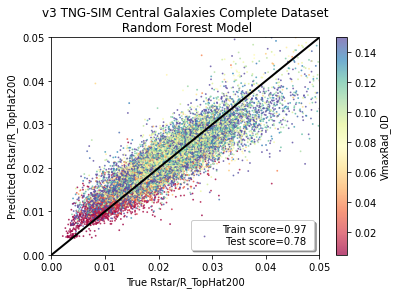

In [16]:
label = ('Train score=0.97 \n Test score=0.78')
plt.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                c = df_0D.loc[:, 'SubhaloVmaxRad_0D'],cmap='Spectral', vmin=0.005, vmax=0.15)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
plt.axis([0.0,0.05, 0.0,0.05])
plt.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
plt.title(r'v3 TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
plt.xlabel('True Rstar/R_TopHat200')
plt.ylabel('Predicted Rstar/R_TopHat200')
plt.legend(loc='lower right', shadow=True)
plt.colorbar(label=r'VmaxRad_0D')

# plt.savefig("TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_RF_size_prediction_colorVmaxRad.jpeg", dpi=500)
plt.show()

### Other metrics

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [11]:
mean_squared_error(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all.loc[:,'y_pred_RF SIM 0D'])

1.380277789933176e-05

In [12]:
np.sqrt(mean_squared_error(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all.loc[:,'y_pred_RF SIM 0D']))

0.0037152089980688517

In [13]:
mean_absolute_error(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all.loc[:,'y_pred_RF SIM 0D'])

0.002624121516564918

In [14]:
mean_absolute_percentage_error(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all.loc[:,'y_pred_RF SIM 0D'])

0.14156685759648932

In [15]:
r2_score(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all.loc[:,'y_pred_RF SIM 0D'])

0.7752796368955611

### Learning Curve

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.7750 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 500}
RF Accuracy: 0.78 (+/- 0.03)


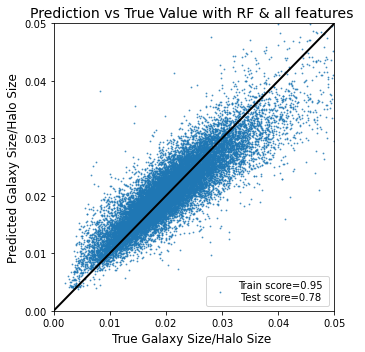

Elapsed time to compute the importances: 0.134 seconds
Elapsed time to compute the importances: 50.516 seconds


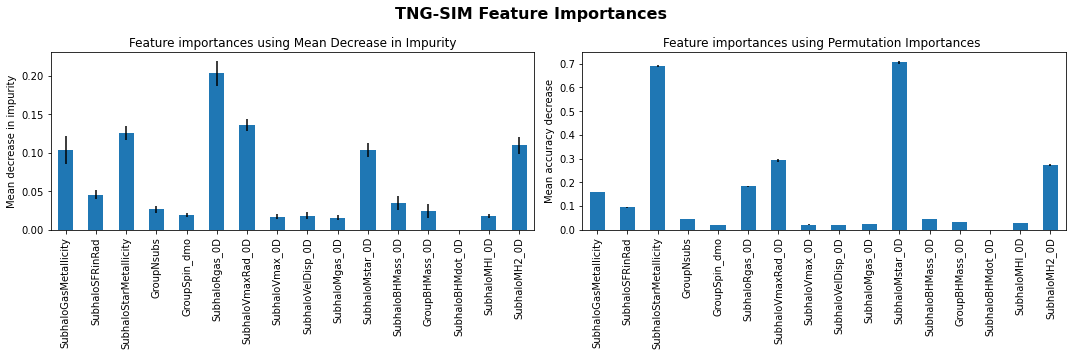

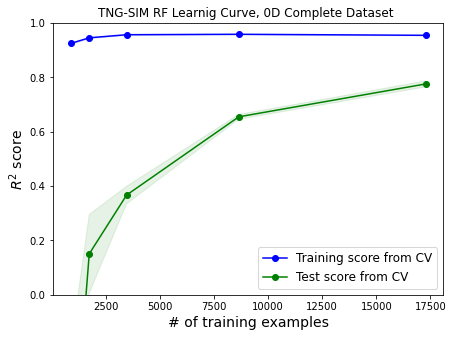

Elapsed time to run RF func and Learning Curves on TNG-SIM 0D Complete Dataset: 1410.356 seconds


In [17]:
# this code takes ~16min to run when the dataset is Group 2 galaxies
# with a subset of ~30,000 entries (out of ~64,000 total)
start_time = time.time()

RF_lc_2 = tp_lc_functions.target_predicting_RF_function(X_all, y_all, r'TNG-SIM RF Learnig Curve, 0D Complete Dataset ')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on TNG-SIM 0D Complete Dataset: {elapsed_time:.3f} seconds")

In [18]:
lc_2 = RF_lc_2[4]
# lc_2.savefig('TNG-SIM_images/v4_RF_FeatRank/v4_TNG-SIM_0D_AllDataset_RF_Learning_Curve_zoom.jpeg', dpi=500)